In [1]:
# !pip install pycaret
# !pip install lazypredict

In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("float_format", "{:.4f}".format)
sns.set_style("whitegrid")

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

# Data Loading

Credit Card Fraud Detection (kaggle)

[Reference] https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [3]:
df = pd.read_csv("./data/creditcard-fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


# Preprocessing

## Quality Check

In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
492 / 284315

0.0017304750013189597

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,1.0888,1.0207,0.9992,0.9953,0.9586,0.9153,0.8763,0.8493,0.8382,0.8140,0.7709,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,-4.7975,-18.6837,-5.7919,-19.2143,-4.4989,-14.1299,-25.1628,-9.4987,-7.2135,-54.4977,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,-0.5354,-0.7625,-0.4056,-0.6485,-0.4256,-0.5829,-0.4680,-0.4837,-0.4988,-0.4563,-0.2117,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,-0.0929,-0.0328,0.1400,-0.0136,0.0506,0.0481,0.0664,-0.0657,-0.0036,0.0037,-0.0625,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,0.4539,0.7396,0.6182,0.6625,0.4931,0.6488,0.5233,0.3997,0.5008,0.4589,0.1330,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,12.0189,7.8484,7.1269,10.5268,8.8777,17.3151,9.2535,5.0411,5.5920,39.4209,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


## Correlation

In [7]:
df.corr()['Class']

Time     -0.0123
V1       -0.1013
V2        0.0913
V3       -0.1930
V4        0.1334
V5       -0.0950
V6       -0.0436
V7       -0.1873
V8        0.0199
V9       -0.0977
V10      -0.2169
V11       0.1549
V12      -0.2606
V13      -0.0046
V14      -0.3025
V15      -0.0042
V16      -0.1965
V17      -0.3265
V18      -0.1115
V19       0.0348
V20       0.0201
V21       0.0404
V22       0.0008
V23      -0.0027
V24      -0.0072
V25       0.0033
V26       0.0045
V27       0.0176
V28       0.0095
Amount    0.0056
Class     1.0000
Name: Class, dtype: float64

In [8]:
# df.corr()['Class'][:-1]
# abs(df.corr()['Class'][:-1])
abs(df.corr()['Class'][:-1]).sort_values(ascending=False)

V17      0.3265
V14      0.3025
V12      0.2606
V10      0.2169
V16      0.1965
V3       0.1930
V7       0.1873
V11      0.1549
V4       0.1334
V18      0.1115
V1       0.1013
V9       0.0977
V5       0.0950
V2       0.0913
V6       0.0436
V21      0.0404
V19      0.0348
V20      0.0201
V8       0.0199
V27      0.0176
Time     0.0123
V28      0.0095
V24      0.0072
Amount   0.0056
V13      0.0046
V26      0.0045
V15      0.0042
V25      0.0033
V23      0.0027
V22      0.0008
Name: Class, dtype: float64

<Axes: >

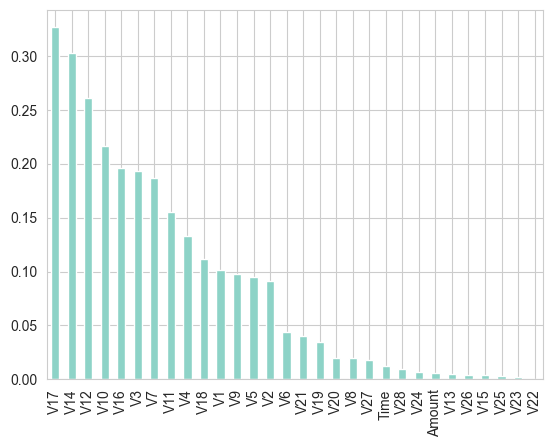

In [9]:
abs(df.corr()['Class'][:-1]).sort_values(ascending=False).plot.bar()

In [10]:
# abs(corr) 값이 0.1 이상인 컬럼만 반영하여 새로운 데이터셋 정의
df_corr = df.corr()['Class']
df2 = df.copy()

for i in df.columns:
    if abs(df_corr[i]) < 0.1:
        df2.drop(i, axis=1, inplace=True)

print(df.shape)
print(df2.shape)

(284807, 31)
(284807, 12)


In [11]:
df2.head()

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
0,-1.3598,2.5363,1.3782,0.2396,0.0908,-0.5516,-0.6178,-0.3112,-0.4704,0.2080,0.0258,0
1,1.1919,0.1665,0.4482,-0.0788,-0.1670,1.6127,1.0652,-0.1438,0.4639,-0.1148,-0.1834,0
2,-1.3584,1.7732,0.3798,0.7915,0.2076,0.6245,0.0661,-0.1659,-2.8901,1.1100,-0.1214,0
3,-0.9663,1.7930,-0.8633,0.2376,-0.0550,-0.2265,0.1782,-0.2879,-1.0596,-0.6841,1.9658,0
4,-1.1582,1.5487,0.4030,0.5929,0.7531,-0.8228,0.5382,-1.1197,-0.4514,-0.2370,-0.0382,0


<Axes: >

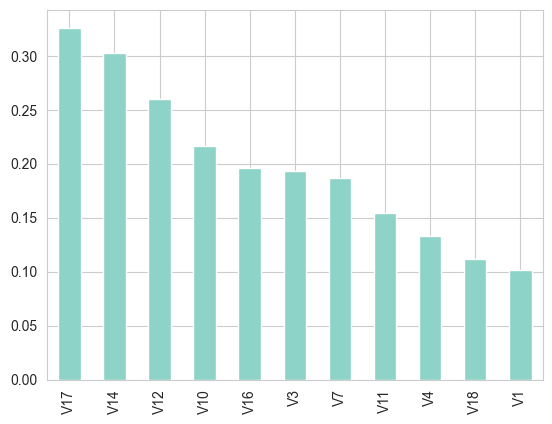

In [12]:
abs(df2.corr()['Class'][:-1]).sort_values(ascending=False).plot.bar()

## Imbalance

In [13]:
from imblearn.under_sampling import RandomUnderSampler

In [14]:
X = df2.drop('Class', axis=1)
y = df2['Class']

In [15]:
sampler = RandomUnderSampler(random_state=RANDOM_STATE)
X_sampled, y_sampled = sampler.fit_resample(X, y)

In [16]:
df_sampled = pd.concat([X_sampled, y_sampled], axis=1)
df_sampled.head()

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
138028,1.3145,-0.6666,0.7166,0.3889,-0.5977,-0.3253,-0.2164,-1.0546,0.6012,0.6311,0.2951,0
63099,-0.7987,0.9045,0.6946,0.4952,0.1705,0.8220,0.4683,0.5730,-0.0116,-0.5046,0.7227,0
73411,-0.3911,1.1221,-1.3087,-0.7013,2.0513,0.5759,-0.5940,-0.3383,-0.7564,0.5351,1.0167,0
164247,-0.0603,-0.9874,-0.0296,0.7756,-1.2386,-0.8411,-0.5865,-0.4367,0.2664,0.7032,0.9167,0
148999,1.8484,0.2693,3.8664,-0.7219,1.1663,1.2975,-1.9210,1.3232,1.3177,-0.4411,0.8041,0


In [17]:
print(
    df2.shape,
    df_sampled.shape,
)

(284807, 12) (984, 12)


In [18]:
print(
    df2['Class'].value_counts(),
    df_sampled['Class'].value_counts(),
)

Class
0    284315
1       492
Name: count, dtype: int64 Class
0    492
1    492
Name: count, dtype: int64


# Model

## Data Definition

In [19]:
X = df_sampled.drop('Class', axis=1)
y = df_sampled['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Initial Model 

- with lazypredict
- [reference] https://pypi.org/project/lazypredict/

In [22]:
from lazypredict.Supervised import LazyClassifier

In [23]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:01<00:00, 21.11it/s]

[LightGBM] [Info] Number of positive: 394, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 787, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500635 -> initscore=0.002541
[LightGBM] [Info] Start training from score 0.002541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:01<00:00, 18.63it/s]


In [24]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.94,0.94,0.94,0.94,0.03
LabelSpreading,0.94,0.94,0.94,0.94,0.02
XGBClassifier,0.94,0.94,0.94,0.94,0.32
LGBMClassifier,0.93,0.93,0.93,0.93,0.53
ExtraTreesClassifier,0.93,0.93,0.93,0.93,0.06
RandomForestClassifier,0.92,0.92,0.92,0.92,0.12
SGDClassifier,0.92,0.92,0.92,0.92,0.03
BaggingClassifier,0.92,0.92,0.92,0.92,0.03
Perceptron,0.92,0.92,0.92,0.92,0.00


## Ensemble

- lazypredict 결과 바탕으로 Top-3 선정
- 앙상블 처리 통해 모델 성능 개선 가능성 확인 
- (대상) LabelPropagation, LabelSpreading, XGBClassifier

In [25]:
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from xgboost import XGBRFClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
model_lp = LabelPropagation()
model_ls = LabelSpreading()
model_xgb = XGBRFClassifier()

In [27]:
ensemble = VotingClassifier(
    estimators=[
        ("label_propagation", model_lp),
        ("label_spreading", model_ls),
        ("xgb", model_xgb),
    ],
    voting="hard",
)

In [28]:
ensemble.fit(X_train_scaled, y_train)
ensemble.score(X_train_scaled, y_train)

1.0

In [29]:
pred = ensemble.predict(X_test_scaled)

print(
    confusion_matrix(y_test, pred),
    classification_report(y_test, pred),
)

[[95  4]
 [ 7 91]]               precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.96      0.93      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



## Parameter Tuning

### Single parameter

In [30]:
from sklearn.model_selection import validation_curve

In [31]:
model_xgb = XGBRFClassifier()

In [32]:
train_scores, valid_scores = validation_curve(
    model_xgb,
    X=X_train_scaled,
    y=y_train,
    param_name="max_depth",
    param_range=np.arange(1, 30, 1),
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

In [33]:
print(
    np.mean(train_scores),
    np.mean(valid_scores),
)

0.976010870331357 0.9443582892904107


In [34]:
mean_valid_score = np.mean(valid_scores, axis=1)
opt_max_depth = np.arange(1, 30, 1)[np.argmax(mean_valid_score)]
print(opt_max_depth)

13


In [36]:
model_xgb = XGBRFClassifier(
    max_depth=opt_max_depth,
    random_state=RANDOM_STATE,
)

model_xgb.fit(X_train_scaled, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=13, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=42, reg_alpha=None, ...)

In [37]:
model_xgb.score(X_train_scaled, y_train)

0.9834815756035579

In [38]:
pred_xgb = model_xgb.predict(X_test_scaled)

print(
    confusion_matrix(y_test, pred),
    classification_report(y_test, pred),
)

[[95  4]
 [ 7 91]]               precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.96      0.93      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



### Multi parameters

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
model_ls = LabelSpreading()
model_lp = LabelPropagation()
model_xgb = XGBRFClassifier()

In [41]:
ensemble = VotingClassifier(
    estimators=[
        ("label_spreading", model_ls),
        ("label_propagation", model_lp),
        ("xgb", model_xgb),
    ],
    voting="hard",
)

***Label Spreading***
*   alpha
    - 레이블 전파의 평활화 정도 조절
    - 값이 낮으면 학습 데이터의 레이블이 강하게 반영

***Label Propagation***
*   gamma
    - RFB 커널의 스케일 파라미터
    - gamma 설정에 따라 레이블 전파의 민감도가 달라짐
    - 값이 크면 각 데이터 포인트의 영향 범위가 좁아짐
*   n-neighbors
    - 커널이 knn인 경우, 최근접 이웃의 수
    - 이웃 수가 많으면 더 넓은 범위에서 정보 반영

In [43]:
param_grid = {
    'label_spreading__kernel': ['rbf', 'knn'],
    'label_spreading__alpha': [0.1, 0.2, 0.3],
    'label_propagation__kernel': ['rbf', 'knn'],
    'label_propagation__n_neighbors': [3, 5, 7],
    'label_propagation__gamma': [0.1, 0.5, 1.0, 5.0, 10.0],
    'xgb__n_estimators': [30, 50, 100, 150],
    'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgb__max_depth': [3, 5, 7],
}

In [44]:
grid_search = GridSearchCV(ensemble, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('label_spreading',
                                                     LabelSpreading()),
                                                    ('label_propagation',
                                                     LabelPropagation()),
                                                    ('xgb',
                                                     XGBRFClassifier(base_score=None,
                                                                     booster=None,
                                                                     callbacks=None,
                                                                     colsample_bylevel=None,
                                                                     colsample_bytree=None,
                                                                     device=None,
                                                                     early_stopping_rounds=None,
                                                                     enable_categorical=False,
                                                                     eval_metric=None,
                                                                     feature_types=None,
                                                                     gam...
             n_jobs=-1,
             param_grid={'label_propagation__gamma': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'label_propagation__kernel': ['rbf', 'knn'],
                         'label_propagation__n_neighbors': [3, 5, 7],
                         'label_spreading__alpha': [0.1, 0.2, 0.3],
                         'label_spreading__kernel': ['rbf', 'knn'],
                         'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__n_estimators': [30, 50, 100, 150]},
             scoring='accuracy')

In [45]:
best_model = grid_search.best_estimator_
pred = best_model.predict(X_test_scaled)

In [46]:
print(
    grid_search.best_score_,
    "\n",
    pd.Series(grid_search.best_params_),
    "\n",
    confusion_matrix(y_test, pred),
    "\n",
    classification_report(y_test, pred),
)

0.9427799725872774 
 label_propagation__gamma         0.10
label_propagation__kernel         knn
label_propagation__n_neighbors      3
label_spreading__alpha           0.10
label_spreading__kernel           knn
xgb__learning_rate               0.10
xgb__max_depth                      7
xgb__n_estimators                  30
dtype: object 
 [[95  4]
 [12 86]] 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.96      0.88      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



### Minimize FN

In [47]:
model_ls = LabelSpreading()
model_lp = LabelPropagation()
model_xgb = XGBRFClassifier()

In [48]:
ensemble = VotingClassifier(
    estimators=[
        ("label_spreading", model_ls),
        ("label_propagation", model_lp),
        ("xgb", model_xgb),
    ],
    voting="soft",
)

ensemble.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('label_spreading', LabelSpreading()),
                             ('label_propagation', LabelPropagation()),
                             ('xgb',
                              XGBRFClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              imp...
                                              interaction_constraints=None,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='binary:logistic',
                                              random_state=None, reg_alpha=None, ...))],
                 voting='soft')

In [49]:
# pred = ensemble.predict(X_test_scaled)
prob = ensemble.predict_proba(X_test_scaled)[:, 1]

In [50]:
threshold = 0.25
pred_adj = np.where(prob >= threshold, 1, 0)

print(
    confusion_matrix(y_test, pred_adj),
    classification_report(y_test, pred_adj),
)

[[90  9]
 [ 5 93]]               precision    recall  f1-score   support

           0       0.95      0.91      0.93        99
           1       0.91      0.95      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [51]:
threshold = 0.3
pred_adj = np.where(prob >= threshold, 1, 0)

print(
    confusion_matrix(y_test, pred_adj),
    classification_report(y_test, pred_adj),
)

[[93  6]
 [ 6 92]]               precision    recall  f1-score   support

           0       0.94      0.94      0.94        99
           1       0.94      0.94      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



# End of Documents